In [1]:
# construct one section hemisphere data from one section data
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

from txtox.utils import get_paths

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

In [2]:
path = get_paths()["data_root"] + "test_one_section.h5ad"
adata = ad.read_h5ad(path)

# roughly partition to one ehmisphere.
adata = adata[adata.obs["x_section"] < 5.4, :].copy()
adata.obs["x_section"] = adata.obs["x_section"] - 2.5
adata.obs["y_section"] = adata.obs["y_section"] - 5.0
print(np.unique(adata.obs["subclass"].values).size, ": number of unique subclasses remain")

/home/rohan/miniconda3/envs/txtox-torch-gpu/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


158 : number of unique subclasses remain


In [3]:
print(adata.obs.columns)
display(adata.obs["brain_section_label"].value_counts().to_frame())

Index(['cell_label', 'brain_section_label', 'cluster_alias',
       'average_correlation_score', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section',
       'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster',
       'neurotransmitter_color', 'class_color', 'subclass_color',
       'supertype_color', 'cluster_color', 'x_reconstructed',
       'y_reconstructed', 'z_reconstructed', 'parcellation_index', 'x_ccf',
       'y_ccf', 'z_ccf', 'parcellation_organ', 'parcellation_category',
       'parcellation_division', 'parcellation_structure',
       'parcellation_substructure', 'parcellation_organ_color',
       'parcellation_category_color', 'parcellation_division_color',
       'parcellation_structure_color', 'parcellation_substructure_color'],
      dtype='object')


,count
brain_section_label,
C57BL6J-638850.38,57917


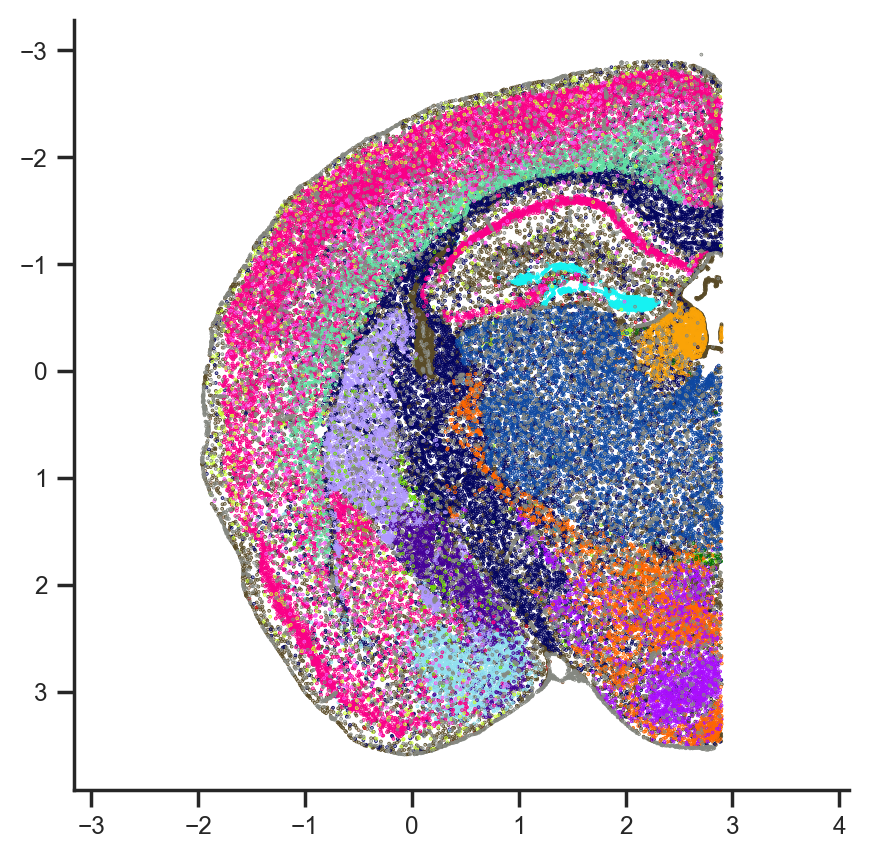

In [4]:
f, ax = plt.subplots(figsize=(5, 5))
ax.scatter(adata.obs["x_section"], adata.obs["y_section"], c=adata.obs["class_color"], s=.1)
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.axis("equal")
ax.invert_yaxis()
plt.show()

In [5]:
# save dataset
path = get_paths()["data_root"] + "test_one_section_hemi.h5ad"
adata.write_h5ad(path)

In [ ]:
# interactive plot
fig = px.scatter(
    data_frame=adata.obs,
    x="x_section",
    y="y_section",
    color="subclass",
    width=1200,
    height=800,
    render_mode="webgl",  # For better performance with many points
    color_discrete_map=dict(zip(adata.obs["subclass"], adata.obs["subclass_color"])),
)
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, scaleanchor="x", scaleratio=1, autorange="reversed"),
    xaxis_range=[-2, 2],
)

fig.show()